In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix

#Import dataset
dataset = pd.read_csv(r'glass.csv')

# Data Processing

In [2]:
dataset.shape

(214, 10)

In [3]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
dataset.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [6]:
dataset.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [7]:
dataset.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


#### Visualizing The Data

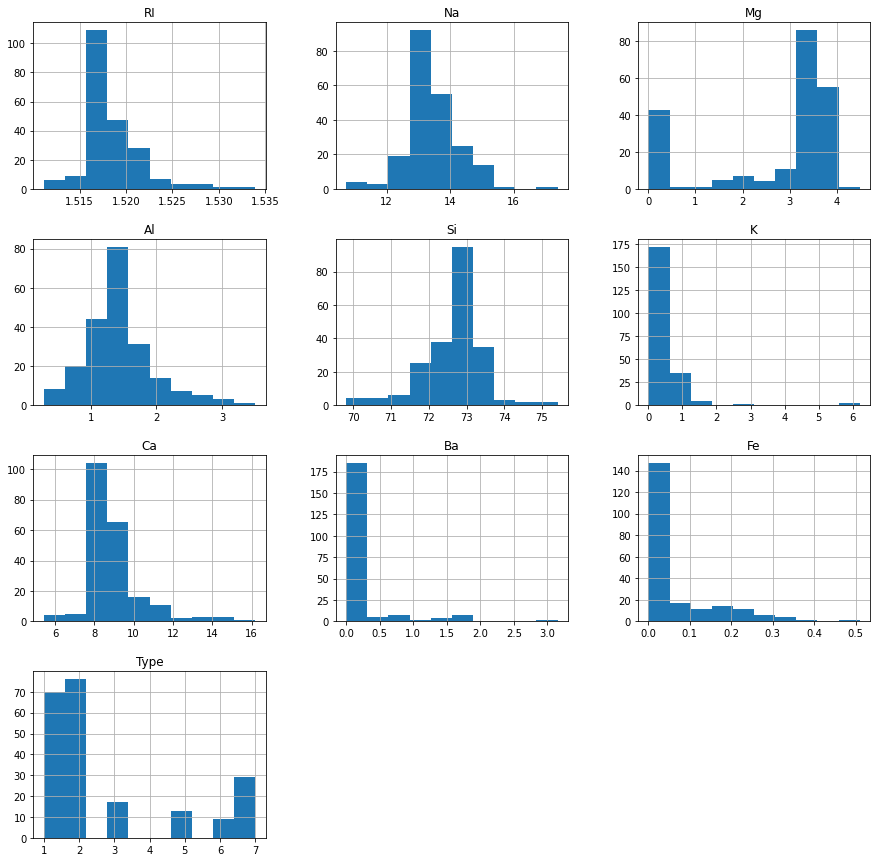

In [8]:
dataset.hist(figsize = (15,15))
plt.show()

#### Checking Null Values

In [9]:
dataset.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

#### Checking For Outliers

In [10]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [11]:
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, ": Yes")
    print(variable, ": No")

In [12]:
for col in dataset.columns:
    has_outliers(dataset, col)

RI : Yes
RI : No
Na : Yes
Na : No
Mg : No
Al : Yes
Al : No
Si : Yes
Si : No
K : Yes
K : No
Ca : Yes
Ca : No
Ba : Yes
Ba : No
Fe : Yes
Fe : No
Type : Yes
Type : No


In [13]:
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

replace_with_thresholds(dataset, dataset.columns)

In [14]:
for col in dataset.columns:
    has_outliers(dataset, col)

RI : No
Na : No
Mg : No
Al : No
Si : No
K : No
Ca : No
Ba : No
Fe : No
Type : No


# K-Medoids Clustering Alorithm

In [15]:
feat = dataset.drop('Type', axis = 1).values
target = dataset['Type'].values

In [16]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmedoids = KMedoids(n_clusters = 5, max_iter = 500, random_state = None)
y_kmedoids = kmedoids.fit_predict(feat)

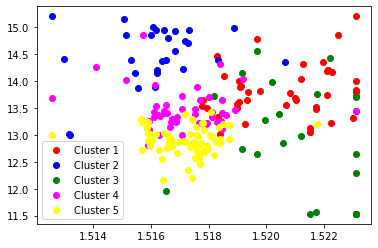

In [17]:
#Visualising the clusters
plt.scatter(feat[y_kmedoids == 0, 0], feat[y_kmedoids == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(feat[y_kmedoids == 1, 0], feat[y_kmedoids == 1, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(feat[y_kmedoids == 2, 0], feat[y_kmedoids == 2, 1], c = 'green', label = 'Cluster 3')
plt.scatter(feat[y_kmedoids == 3, 0], feat[y_kmedoids == 3, 1], c = 'magenta', label = 'Cluster 4')
plt.scatter(feat[y_kmedoids == 4, 0], feat[y_kmedoids == 4, 1], c = 'yellow', label = 'Cluster 5')
plt.legend()
plt.show()

# Agglomerative Hierarchical Clustering Algorithm

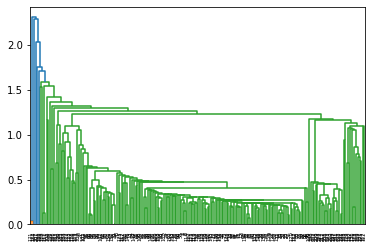

In [18]:
#Using the dendrogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(feat,method='single'))

In [19]:
#Fitting hierarchical clustering to the dataset
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')
y_hc = hc.fit_predict(feat)

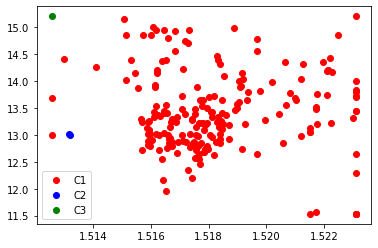

In [20]:
#Visualize clusters
plt.scatter(feat[y_hc == 0,0],feat[y_hc == 0,1],c='red',label='C1')
plt.scatter(feat[y_hc == 1,0],feat[y_hc == 1,1],c='blue',label='C2')
plt.scatter(feat[y_hc == 2,0],feat[y_hc == 2,1],c='green',label='C3')
plt.legend()
plt.show()

# Naive Bayes Algorithm

In [21]:
x_train , x_test, y_train , y_test = train_test_split(feat, target , test_size=0.2, random_state = None)
df = GaussianNB()
df.fit(x_train,y_train.ravel())
y_prediction = df.predict(x_test)
y_prediction

array([2, 2, 1, 6, 6, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 3, 1, 1, 6,
       1, 6, 1, 1, 2, 1, 1, 1, 1, 1, 6, 1, 6, 1, 6, 2, 6, 1, 2, 1, 3],
      dtype=int64)

In [22]:
# Calculating the accuracy
acc = int(accuracy_score(y_test, y_prediction)*100)
print("The Accuracy is ", acc, '%',sep='')
print(y_prediction)
print("Confussion Matrix")
print(confusion_matrix(y_test, y_prediction))

The Accuracy is 58%
[2 2 1 6 6 2 1 1 2 2 1 1 2 2 2 1 2 1 3 1 1 6 1 6 1 1 2 1 1 1 1 1 6 1 6 1 6
 2 6 1 2 1 3]
Confussion Matrix
[[9 4 0 0 0]
 [8 7 1 0 0]
 [4 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 0 8]]
